# VND Banknotes Classifer

<img src='https://hochiminhcityhighlights.com/wp-content/uploads/2014/05/Vietnames-Dong-500-000-to-10-000.jpg' width=600>

## Get Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pathlib
import glob
import matplotlib.pyplot as plt
import numpy as np
import time


import os, tarfile
import pathlib
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [ ]:
# Create folder VND_Banknotes_Classifier
current_path = pathlib.Path('.')
sample_data_path = current_path/'sample_data'
VND_Banknotes_Classifier = sample_data_path/'VND_Banknotes_Classifier'
VND_Banknotes_Classifier.mkdir()

Extract dataset in VND_Banknotes_Classifier

In [ ]:
import zipfile
import os

data_zip_path = '/content/gdrive/MyDrive/Copy of VND_Banknotes_dataset.zip'

zip_ref = zipfile.ZipFile(data_zip_path, 'r')

zip_ref.extractall('/content/gdrive/MyDrive/ML_Project/Money')
zip_ref.close()

In [ ]:
num_class = list(VND_Banknotes_Classifier.glob("*"))

print(len(num_class))

9


Split train and validation set

In [ ]:
data_dir = '/content/gdrive/MyDrive/ML_Project/Money/VND_Banknotes_dataset'
data_dir

'/content/gdrive/MyDrive/ML_Project/Money/VND_Banknotes_dataset'

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                                data_dir,
                                                                validation_split = 0.2,
                                                                subset = 'training',
                                                                seed = 123,
                                                                image_size = (224,224),
                                                                batch_size = 32
                                                              )

Found 3187 files belonging to 9 classes.
Using 2550 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                            data_dir,
                                                            validation_split = 0.2,
                                                            subset = 'validation',
                                                            seed = 123,
                                                            image_size = (224,224),
                                                            batch_size = 32
                                                            )

Found 3187 files belonging to 9 classes.
Using 637 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['1000', '10000', '100000', '2000', '20000', '200000', '5000', '50000', '500000']


## Visualize

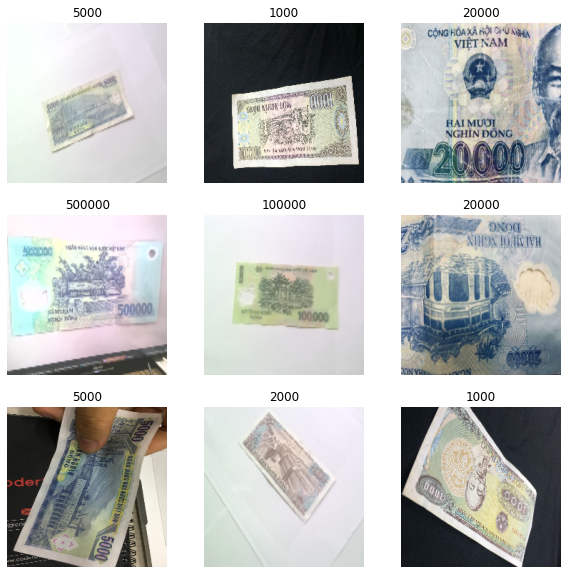

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8")) # *255 if image rescaled
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Resizing, rescaling, and augmentation

In [ ]:
IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  tf.keras.layers.experimental.preprocessing.RandomContrast(0.2)
])

In [ ]:
# Images all image in train_ds
# Vì sao có số 32 -> Vì chúng ta khai báo batch_size là 32, cho nên mỗi batch có 32 images
images.shape

TensorShape([32, 224, 224, 3])

In [ ]:
# Take 1 là mình lấy batch ra
for images, labels in train_ds.take(1):
  print(images.shape)

(32, 224, 224, 3)


In [ ]:
# Lấy 1 tấm hình ra từ 32 image.
# Số index này chỉ tượng trưng cho thứ tự của 32 image
image = images[4]
image.shape

TensorShape([224, 224, 3])

In [ ]:
# Augmentation nhận vào (1,224,224,3)
image = tf.expand_dims(image,0)
image.shape

TensorShape([1, 224, 224, 3])

In [ ]:
image.dtype

tf.float32

In [ ]:
# Augmentation image to show
data_augmentation(image).shape

TensorShape([1, 224, 224, 3])

In [ ]:
# imshow input 3D
data_augmentation(image)[0].shape

TensorShape([224, 224, 3])

In [ ]:
# imshow with RGB data ([0..1] for floats or [0..255] for integer
data_augmentation(image)[0]/255

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.17398936, 0.16993585, 0.15515289],
        [0.17628075, 0.17210975, 0.15776473],
        [0.1771882 , 0.17289321, 0.15895483],
        ...,
        [0.4722485 , 0.41420263, 0.35160255],
        [0.46591607, 0.40991798, 0.3504092 ],
        [0.46571648, 0.41077447, 0.35452545]],

       [[0.17982024, 0.17654888, 0.15584278],
        [0.17637731, 0.17237854, 0.15433966],
        [0.17568752, 0.17110294, 0.15557605],
        ...,
        [0.49029532, 0.43190935, 0.36307237],
        [0.49553716, 0.43963295, 0.3727879 ],
        [0.5034739 , 0.44698617, 0.37927416]],

       [[0.24369241, 0.23588349, 0.20781706],
        [0.23196082, 0.22287022, 0.19889633],
        [0.22708777, 0.21755238, 0.19701368],
        ...,
        [0.52463114, 0.46094686, 0.3881537 ],
        [0.53014404, 0.46765316, 0.39533365],
        [0.5358874 , 0.47480664, 0.39911538]],

       ...,

       [[0.18080278, 0.17673936, 0.15481521],
        [0.17

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


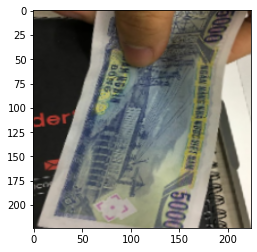

In [ ]:
plt.imshow(data_augmentation(image)[0]/255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


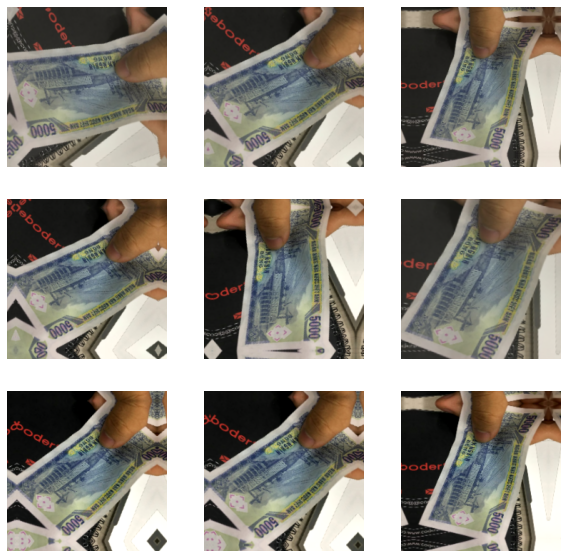

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)[0]/255
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image)
  plt.axis("off")

## Transfer learning MobileNet

In [ ]:
# Get model
mbnv2 = keras.applications.MobileNetV2(weights='imagenet',
                                              input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                              include_top=False)

mbnv2.trainable = False

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def mnv2_maker():
  inputs = keras.Input(shape=(224,224,3))
  x = preprocess_input(inputs)
  x = mbnv2(x, training=False)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dropout(0.2)(x)
  outputs = layers.Dense(9, activation='softmax')(x)
  model = keras.Model(inputs, outputs)
  return model

In [ ]:
model_mbnv2 = mnv2_maker()
model_mbnv2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.math.truediv_3 (TFOpLambd (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract_3 (TFOpLamb (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 1152

In [ ]:
model_mbnv2.compile(optimizer='adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
callback = [EarlyStopping(monitor = 'val_loss', 
                          patience=10, 
                          restore_best_weights=True),

            ReduceLROnPlateau(monitor = 'val_loss',
                              patience = 10,
                              factor = 0.7,
                              min_lr = 1e-2),

            ModelCheckpoint(filepath="/content/gdrive/MyDrive/ML_Project/Money/Model_train/model_2.h5",
                                                 save_weights_only=False, # the whole model (False) or only weights (True) 
                                                 save_best_only=True, # keep the best model with lowest validation loss
                                                 monitor='val_loss',
                                                 verbose=1 )]


In [ ]:
history_mbv2 = model_mbnv2.fit(train_ds,
                              validation_data = val_ds,
                              epochs = 10,
                              callbacks = callback)

Epoch 1/10
80/80 [==============================] - 46s 532ms/step - loss: 0.0380 - accuracy: 0.9969 - val_loss: 0.1452 - val_accuracy: 0.9670

Epoch 00001: val_loss did not improve from 0.14450
Epoch 2/10
80/80 [==============================] - 46s 532ms/step - loss: 0.0359 - accuracy: 0.9973 - val_loss: 0.1459 - val_accuracy: 0.9702

Epoch 00002: val_loss did not improve from 0.14450
Epoch 3/10
80/80 [==============================] - 46s 533ms/step - loss: 0.0360 - accuracy: 0.9973 - val_loss: 0.1420 - val_accuracy: 0.9670

Epoch 00003: val_loss improved from 0.14450 to 0.14198, saving model to /content/gdrive/MyDrive/ML_Project/Money/Model_train/model_2.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 4/10
80/80 [==============================] - 46s 532ms/step - loss: 0.0313 - accuracy: 0.9973 - val_loss: 0.1421 - val_accuracy: 0.9670

Epoch 00004: val_loss did not improve from 0.14198
Epoch 5/10
80/80 [==============================] - 46s 533ms/step - loss: 0.0319 - accuracy: 0.9980 - val_loss: 0.1372 - val_accuracy: 0.9686

Epoch 00005: val_loss improved from 0.14198 to 0.13724, saving model to /content/gdrive/MyDrive/ML_Project/Money/Model_train/model_2.h5
Epoch 6/10
80/80 [==============================] - 46s 533ms/step - loss: 0.0303 - accuracy: 0.9988 - val_loss: 0.1401 - val_accuracy: 0.9670

Epoch 00006: val_loss did not improve from 0.13724
Epoch 7/10
80/80 [==============================] - 46s 534ms/step - loss: 0.0276 - accuracy: 0.9984 - val_loss: 0.1383 - val_accuracy: 0.9686

Epoch 00007: val_loss did not improve from 0.13724
Epoch 8/10
80/80 [==============================] - 46s 533ms/step - loss: 0.0283 - accuracy: 0.9973 - val_loss: 0.1429 - val_accuracy:

In [ ]:
# Continue training

init_epochs = 40
fine_tune_epochs = 50
total_epochs = init_epochs + fine_tune_epochs

history_mbv2 = model_mbnv2.fit(train_ds, 
                         validation_data=val_ds,
                         epochs=total_epochs,
                         initial_epoch=init_epochs,
                         callbacks=callbacks)

## Model evaluate

In [ ]:
model_mbnv2.evaluate(val_ds)

11/11 [==============================] - 7s 143ms/step - loss: 0.1714 - accuracy: 0.9615


[0.1714203655719757, 0.9615384340286255]

Save model

In [ ]:
model_mbnv2.save('/content/gdrive/MyDrive/ML_Project/Money/Model_train/model97')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML_Project/Money/Model_train/model97/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/DATASET/Model_trained/model_mbnv2.h5')

In [ ]:
model.evaluate(val_ds)

11/11 [==============================] - 25s 182ms/step - loss: 0.1714 - accuracy: 0.9615


[0.1714203804731369, 0.9615384340286255]

In [ ]:
image_path = '/content/gdrive/MyDrive/ML_Project/Money/VND_Banknotes_dataset/10000/0_564_1631982055.6476264.png'

In [ ]:
def check_image_prediction():
  from google.colab import files
  uploaded = files.upload()
  for fn in uploaded.keys():
    print(fn)
    img_path = './' + fn

  img        = image.load_img(img_path, target_size=(224, 224))
  img_array  = image.img_to_array(img)
  img_array  = np.expand_dims(img_array, axis=0)

  prediction = model_mbnv2.predict(img_array)

  pred = val_ds.class_names[prediction[0].argmax()]
  return pred

In [ ]:
check_image_prediction()

Saving image0.jpg to image0.jpg
image0.jpg


'100000'

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print(fn)
  img_path = './' + fn

img        = image.load_img(img_path, target_size=(224, 224))

img_array  = image.img_to_array(img)
img_array  = np.expand_dims(img_array, axis=0)

prediction = model_mbnv2.predict(img_array)

pred = val_ds.class_names[prediction[0].argmax()]


Saving 9.s-l300.jpg to 9.s-l300.jpg
9.s-l300.jpg


In [ ]:
int(prediction.argmax(axis=-1))

0

In [ ]:
label = {0: '1,000 VND', 1: '10,000 VND', 2: '100,000 VND ', 3: '2000 VND', 4: '20,000 VND', 5: '200,000 VND', 
6: '5,000 VND', 7: '50,000 VND', 8: '500,000 VND'}

In [ ]:
label[int(prediction.argmax(axis=-1))]

'1,000 VND'

In [ ]:
img        = image.load_img(img_path, target_size=(224, 224))
np.resize(img, (224,224))
img_array  = image.img_to_array(img)
img_array  = np.expand_dims(img_array, axis=0)

In [ ]:
prediction = model_mbnv2.predict(img_array)

In [ ]:
prediction.argmax(axis=-1)

array([8])

In [ ]:
print(val_ds.class_names)

['1000', '10000', '100000', '2000', '20000', '200000', '5000', '50000', '500000']
